In [98]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn import preprocessing 

In [ ]:
#Perform Linear Regression
def linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = mean_squared_error(y_test, prediction)
    return error,prediction

#Perform Polynomial Regression
def polynomial_regression(X_train, y_train, X_test, y_test, degree=2):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    prediction = model.predict(X_poly_test)
    error = mean_squared_error(y_test, prediction)
    return error,prediction

#Perform Ridge Regression
def ridge_regression(X_train, y_train, X_test, y_test):
    model = Ridge()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = mean_squared_error(y_test, prediction)
    return error,prediction

#Perform Lasso Regression
def lasso_regression(X_train, y_train, X_test, y_test):
    model = Lasso()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = mean_squared_error(y_test, prediction)
    return error,prediction

#Perform Elastic Net
def elastic_net_regression(X_train, y_train, X_test, y_test):
    model = ElasticNet()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = mean_squared_error(y_test, prediction)
    return error,prediction
#Perform SVM Regression
def svm_regression(X_train, y_train, X_test, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error = mean_squared_error(y_test, prediction)

In [4]:
df = pd.read_csv('data\Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Balamurukan S\AppData\Local\Temp\ipykernel_15088\3718914200.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('data\Mall_Customers.csv')


In [103]:
df.head()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [ ]:
df['Annual Income'].unique()

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##Data Cleaning & Preprocessing

In [18]:
# Encode gender column
label_encoder = preprocessing.LabelEncoder()  
df['Gender']= label_encoder.fit_transform(df['Gender']) 

In [15]:
# Rename Columns
df.rename(columns={'Annual Income (k$)':'Annual Income'},inplace=True)
df.rename(columns={'Spend1ing Score (1-100)':'Spending Score'},inplace=True)

In [41]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
Annual Income     False
Spending Score    False
dtype: bool

1. Barplot

<Axes: >

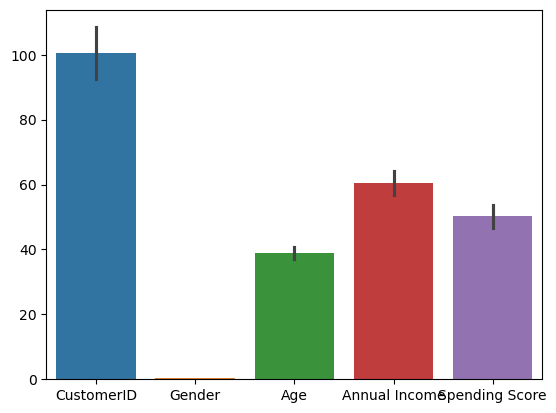

In [31]:
sb.barplot(df)

2. Histograms

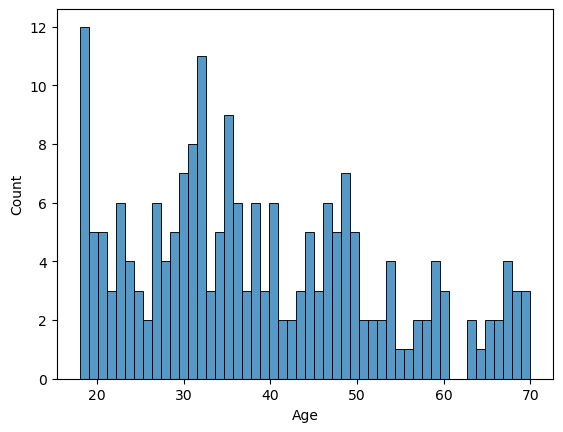

In [68]:
# plt.figure(figsize=(15,18))
sb.histplot(df['Age'],bins=50)
plt.xlabel='Age'
plt.ylabel='Values'
plt.title='Age Distribution'


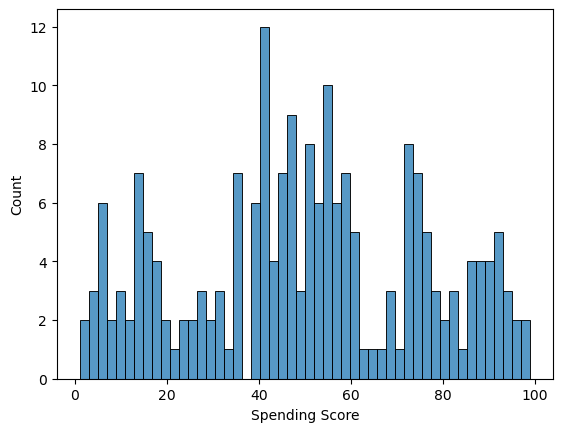

In [69]:
# plt.figure(figsize=(15,18))
sb.histplot(df['Spending Score'],bins=50)
plt.xlabel='Spending Score'
plt.ylabel='Values'
plt.title='Spending Distribution'


In [ ]:
# plt.figure(figsize=(15,18))
sb.histplot(df['Annual Income'],bins=50)
plt.xlabel='Annual Income'
plt.ylabel='Values'
plt.title='Income Distribution'

3. Scatterplot

<Axes: xlabel='Age', ylabel='Annual Income'>

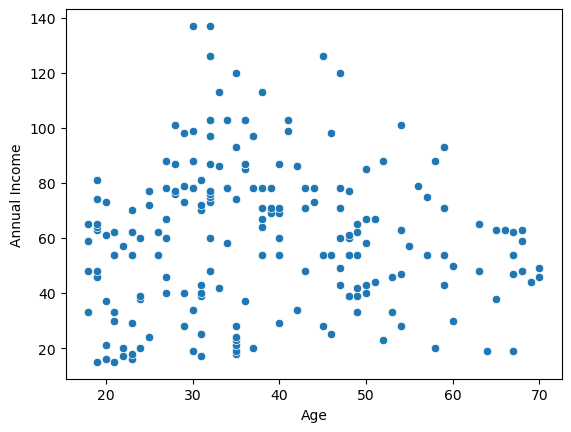

In [71]:
sb.scatterplot(x=df['Age'],y=df['Annual Income'])

<Axes: xlabel='Age', ylabel='Spending Score'>

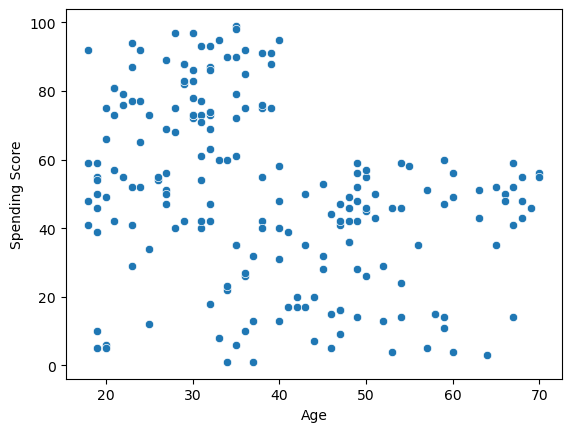

In [72]:
sb.scatterplot(x=df['Age'],y=df['Spending Score'])

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

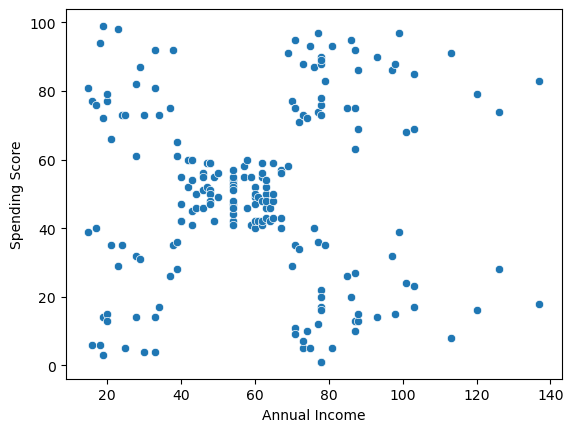

In [73]:
sb.scatterplot(x=df['Annual Income'],y=df['Spending Score'])

4. Correlation Heatmap

<Axes: >

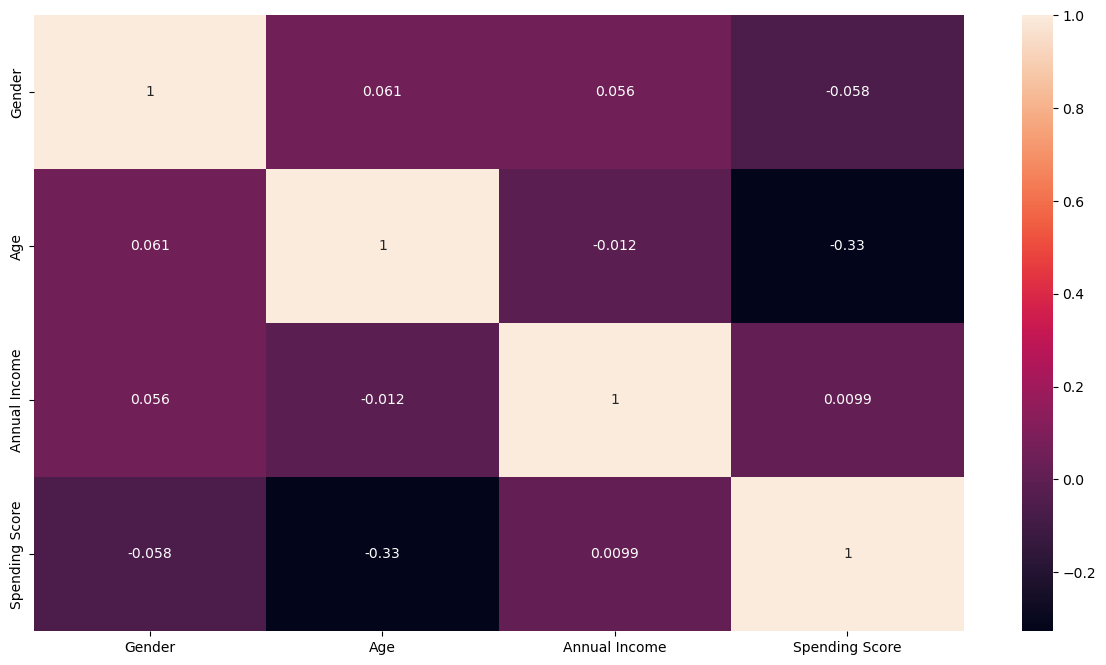

In [75]:
sel_cols = df[['Gender','Age','Annual Income','Spending Score']].corr()
plt.figure(figsize=(15,8))
sb.heatmap(sel_cols,annot=True)

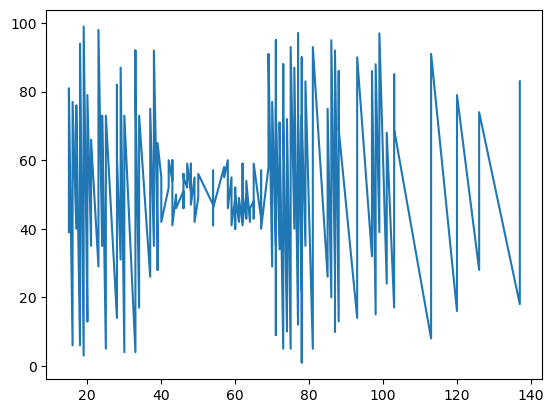

In [101]:
#Line Graph
plt.plot(df['Annual Income'],df['Spending Score'])

# Train Test Split

In [80]:
x=df[['Age']]
y=df['Spending Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [97]:
# Fit a linear model
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
# Calculate the errors
lr_mse = mean_squared_error(y_test, lr_predict)
lr_mae = mean_absolute_error(y_test, lr_predict)
lr_rmse = np.sqrt(lr_mse)
print('MSE: ',lr_mse)
print('MAE: ',lr_mae)
print('RMSE: ',lr_rmse)

MSE:  609.6938576805135
MAE:  21.258031563013127
RMSE:  24.691979622551802


In [100]:
# Fit a polynomial model (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)
predictions = model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, predictions)
poly_mae = mean_absolute_error(y_test, lr_predict)
print('MSE: ',poly_mse)
print('MAE: ',poly_mae)


MSE:  639.2880094908838
MAE:  21.258031563013127


In [116]:
#New values

new_values = np.array([140,156]).reshape(-1,1)

predictions_1 = lr.predict(new_values)
predictions_1

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ -4.26944261, -12.64496458])